In [1]:
import pandas as pd
from statsmodels.regression.linear_model import OLS
import numpy as np

In [63]:
df = pd.read_excel('Italy.xlsx', index_col=0)
df

FileNotFoundError: [Errno 2] No such file or directory: 'Italy.xlsx'

In [64]:
y = np.log(df.iloc[:, 0])
y.name = 'Infected cases'
x = df[['max', 'humidity']].sub([15, 75])
x.columns = ['Temp - 15oC', 'Humidity - 75%']
res = OLS(y, x, hasconst=False).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:         Infected cases   R-squared (uncentered):                   0.338
Model:                            OLS   Adj. R-squared (uncentered):              0.269
Method:                 Least Squares   F-statistic:                              4.857
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                      0.0198
Time:                        15:40:14   Log-Likelihood:                         -62.832
No. Observations:                  21   AIC:                                      129.7
Df Residuals:                      19   BIC:                                      131.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

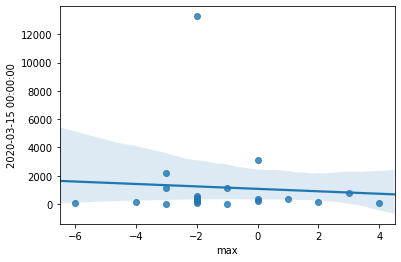

In [22]:
import seaborn as sns

sns.regplot(x=(df.iloc[:,4]-15), y=df.iloc[:,0], data=df)

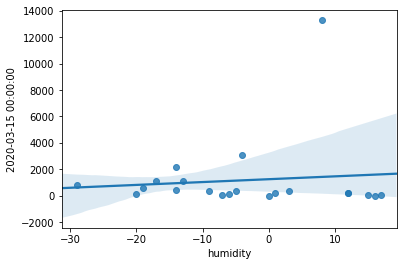

In [20]:
import seaborn as sns

sns.regplot(x=(df.iloc[:,-1]-75), y=df.iloc[:,0], data=df)


In [6]:
df.iloc[-3, 2] = 1
y = np.log(df.iloc[:, 0]/df.iloc[:, 2])
y.name = 'Growth rate'
res = OLS(y, x, hasconst=False).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Growth rate   R-squared (uncentered):                   0.225
Model:                            OLS   Adj. R-squared (uncentered):              0.143
Method:                 Least Squares   F-statistic:                              2.755
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                      0.0890
Time:                        13:10:21   Log-Likelihood:                         -52.485
No. Observations:                  21   AIC:                                      109.0
Df Residuals:                      19   BIC:                                      111.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [65]:
import geopandas
import os
path = '/Users/dangngochuy/Downloads/covid19-master/Italy_shapefiles'
os.chdir(path)

In [66]:
import geopandas as gpd
geodf = gpd.read_file("gadm36_ITA_1.shp", index_col = 3)

In [67]:
geodf

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,ITA,Italy,ITA.1_1,Abruzzo,Abruzos|Abruzzen|Abruzzes|Abruzzi,None,Regione,Region,13,None,"POLYGON ((14.53183 41.80166, 14.53246 41.80097..."
1,ITA,Italy,ITA.2_1,Apulia,Apulien|Pouilles|Pouille|Puglia|Puglie,None,Regione,Region,16,None,"MULTIPOLYGON (((17.94931 40.05375, 17.94931 40..."
2,ITA,Italy,ITA.3_1,Basilicata,Basilicate|Lucania,None,Regione,Region,17,None,"MULTIPOLYGON (((15.71736 39.96792, 15.71736 39..."
3,ITA,Italy,ITA.4_1,Calabria,Calabre|Calabrie|Kalabrien,None,Regione,Region,18,None,"MULTIPOLYGON (((15.80208 39.70014, 15.80208 39..."
4,ITA,Italy,ITA.5_1,Campania,Campanha|Campanie|Kampanien,None,Regione,Region,15,None,"MULTIPOLYGON (((13.93197 40.74681, 13.93514 40..."
5,ITA,Italy,ITA.6_1,Emilia-Romagna,Emilia Romagna|Emilia|Emilia-Romaña|Émilie-Rom...,None,Regione,Region,8,None,"MULTIPOLYGON (((12.41045 43.89840, 12.40637 43..."
6,ITA,Italy,ITA.7_1,Friuli-Venezia Giulia,Friuli Venezia Giulia|Friuli-Venecia Julia,None,Regione,Autonomous Region,6,None,"MULTIPOLYGON (((13.31625 45.69347, 13.31625 45..."
7,ITA,Italy,ITA.8_1,Lazio,Lacio|Latium,None,Regione,Region,12,None,"MULTIPOLYGON (((13.45514 40.79264, 13.45514 40..."
8,ITA,Italy,ITA.9_1,Liguria,Ligurie|Ligurien,None,Regione,Region,7,None,"MULTIPOLYGON (((9.84792 44.02930, 9.84792 44.0..."
9,ITA,Italy,ITA.10_1,Lombardia,Lombardy|Lombardei|Lombardie,None,Regione,Region,3,None,"MULTIPOLYGON (((8.70649 45.02543, 8.70675 45.0..."


In [83]:
merged_df = pd.merge(left = x, right = y, left_on= x.index, right_on= y.index)
merged_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases
0,Lombardia,-2,8,9.493412
1,Emilia Romagna,0,-4,8.036897
2,Veneto,-3,-14,7.682482
3,Marche,-1,-17,7.032624
4,Piemonte,-3,-13,7.013016
5,Toscana,3,-29,6.660575
6,Liguria,-2,-19,6.326149
7,Lazio,-2,-14,6.077642
8,Friuli Venezia Giulia,-2,-9,5.849325
9,Trento,0,3,5.934894


In [87]:
#Combine Trento and Bolzano into Trentino-Alto Adige region and take the average of the two 

merged_df.reset_index().replace({'key_0': {'Bolzano': 'Trento'}}).groupby('key_0', sort=False).sum()
merged_df = merged_df[merged_df.key_0 != 'Bolzano']


In [89]:
geodf.NAME_1
geodf["NAME_1"].replace({"Apulia": "Puglia", "Emilia-Romagna": "Emilia Romagna", "Friuli-Venezia Giulia": "Friuli Venezia Giulia", "Sicily": "Sicilia"}, inplace=True)
merged_df["key_0"].replace({"Trento":"Trentino-Alto Adige"}, inplace=True)

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [91]:
merged_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases
0,Lombardia,-2,8,9.493412
1,Emilia Romagna,0,-4,8.036897
2,Veneto,-3,-14,7.682482
3,Marche,-1,-17,7.032624
4,Piemonte,-3,-13,7.013016
5,Toscana,3,-29,6.660575
6,Liguria,-2,-19,6.326149
7,Lazio,-2,-14,6.077642
8,Friuli Venezia Giulia,-2,-9,5.849325
9,Trentino-Alto Adige,0,3,5.934894


In [93]:
final_merged_df = pd.merge(left = merged_df, right = geodf, left_on= 'key_0', right_on= 'NAME_1')
final_merged_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,Lombardia,-2,8,9.493412,ITA,Italy,ITA.10_1,Lombardia,Lombardy|Lombardei|Lombardie,None,Regione,Region,3,None,"MULTIPOLYGON (((8.70649 45.02543, 8.70675 45.0..."
1,Emilia Romagna,0,-4,8.036897,ITA,Italy,ITA.6_1,Emilia Romagna,Emilia Romagna|Emilia|Emilia-Romaña|Émilie-Rom...,None,Regione,Region,8,None,"MULTIPOLYGON (((12.41045 43.89840, 12.40637 43..."
2,Veneto,-3,-14,7.682482,ITA,Italy,ITA.20_1,Veneto,Venecia|Venetia|Venezia Euganea,None,Regione,Region,5,None,"MULTIPOLYGON (((12.41625 44.82875, 12.41625 44..."
3,Marche,-1,-17,7.032624,ITA,Italy,ITA.11_1,Marche,Marches|Marca,None,Regione,Region,11,None,"POLYGON ((13.19071 42.73443, 13.18863 42.73454..."
4,Piemonte,-3,-13,7.013016,ITA,Italy,ITA.13_1,Piemonte,Piemont|Piémont|Piemonte|Piedmont,None,Regione,Region,1,None,"POLYGON ((9.19909 44.65079, 9.19972 44.64971, ..."
5,Toscana,3,-29,6.660575,ITA,Italy,ITA.16_1,Toscana,Tuscany|Toscane|Toskana,None,Regione,Region,9,None,"MULTIPOLYGON (((11.11042 42.26347, 11.11042 42..."
6,Liguria,-2,-19,6.326149,ITA,Italy,ITA.9_1,Liguria,Ligurie|Ligurien,None,Regione,Region,7,None,"MULTIPOLYGON (((9.84792 44.02930, 9.84792 44.0..."
7,Lazio,-2,-14,6.077642,ITA,Italy,ITA.8_1,Lazio,Lacio|Latium,None,Regione,Region,12,None,"MULTIPOLYGON (((13.45514 40.79264, 13.45514 40..."
8,Friuli Venezia Giulia,-2,-9,5.849325,ITA,Italy,ITA.7_1,Friuli Venezia Giulia,Friuli Venezia Giulia|Friuli-Venecia Julia,None,Regione,Autonomous Region,6,None,"MULTIPOLYGON (((13.31625 45.69347, 13.31625 45..."
9,Trentino-Alto Adige,0,3,5.934894,ITA,Italy,ITA.17_1,Trentino-Alto Adige,Trentino - Alto Adige|Trentino-Alto Adigio|Tre...,None,Regione,Autonomous Region,4,None,"POLYGON ((11.68530 45.98497, 11.68681 45.97018..."


In [95]:
final_merged_df.drop(final_merged_df.iloc[:, 4:14], axis = 1, inplace = True) 
final_merged_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases,geometry
0,Lombardia,-2,8,9.493412,"MULTIPOLYGON (((8.70649 45.02543, 8.70675 45.0..."
1,Emilia Romagna,0,-4,8.036897,"MULTIPOLYGON (((12.41045 43.89840, 12.40637 43..."
2,Veneto,-3,-14,7.682482,"MULTIPOLYGON (((12.41625 44.82875, 12.41625 44..."
3,Marche,-1,-17,7.032624,"POLYGON ((13.19071 42.73443, 13.18863 42.73454..."
4,Piemonte,-3,-13,7.013016,"POLYGON ((9.19909 44.65079, 9.19972 44.64971, ..."
5,Toscana,3,-29,6.660575,"MULTIPOLYGON (((11.11042 42.26347, 11.11042 42..."
6,Liguria,-2,-19,6.326149,"MULTIPOLYGON (((9.84792 44.02930, 9.84792 44.0..."
7,Lazio,-2,-14,6.077642,"MULTIPOLYGON (((13.45514 40.79264, 13.45514 40..."
8,Friuli Venezia Giulia,-2,-9,5.849325,"MULTIPOLYGON (((13.31625 45.69347, 13.31625 45..."
9,Trentino-Alto Adige,0,3,5.934894,"POLYGON ((11.68530 45.98497, 11.68681 45.97018..."


In [ ]:
clusters_df.crs = {'init' :'epsg:4326'}
ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wlthindf', legend=True, figsize=(12, 10), markersize = 20)
#roads_plot = roads_df.plot(ax = ax)
contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
plt.show()

In [107]:
#Install libraries for geospatial data wrangling and analysis

#Geopandas for wrangling
#!pip install geopandas


#Contextily for basemap plotting 
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy
#!pip3 install contextily==1.0rc2
#!pip install descartes

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pip/_internal/req/req_install.py:407: UserWarning: Unbuilt egg for Unknown [unknown version] (/Users/dangngochuy/anaconda3/lib/python3.6/site-packages)
  self.satisfied_by = pkg_resources.get_distribution(str(no_marker))
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/dangn

In [108]:
import geopandas
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily

In [ ]:
final_merged_df = GeoDataFrame(final_merged_df) 

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


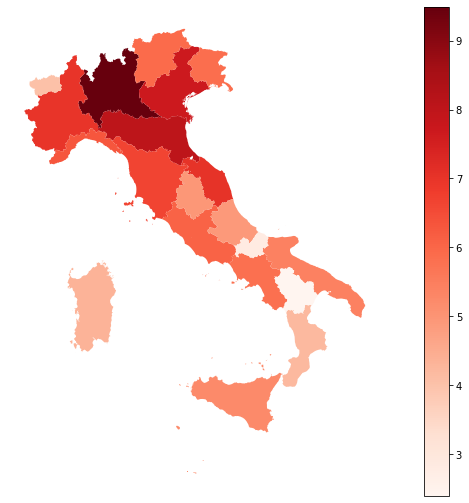

In [115]:
final_merged_df.crs = {'init' :'epsg:4326'}
ax = final_merged_df.to_crs(epsg=3857).plot(column='Infected cases', cmap = 'Reds', figsize=(15,9), k=3, legend = True);
ax.set_axis_off()
plt.show()

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


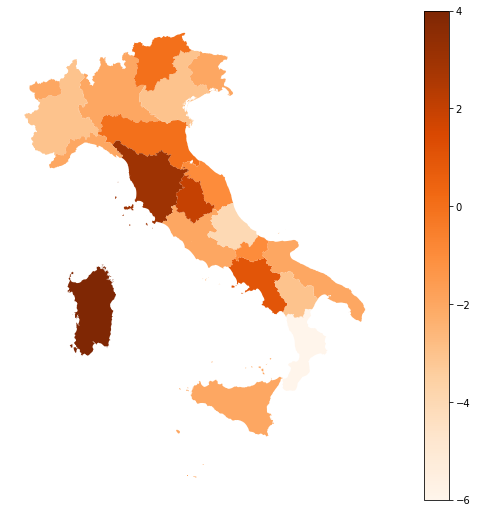

In [117]:
final_merged_df.crs = {'init' :'epsg:4326'}
ax = final_merged_df.to_crs(epsg=3857).plot(column='Temp - 15oC', cmap = 'Oranges', figsize=(15,9), k=3, legend = True);
ax.set_axis_off()
plt.show()